In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# x ^ 2 + x * 5 + 3
x = np.arange(-50, 51, 0.5)
y = x ** 2 + x * 5 + 3

In [3]:
y.shape

(202,)

In [4]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)

x_train.shape, x_test.shape

((161,), (41,))

## 1) model difinition

In [5]:
model_1 = keras.Sequential()
model_1.add(keras.layers.Dense(units=1420, activation='relu', input_shape=(1,)))
model_1.add(keras.layers.Dense(units=1))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model_1.compile(optimizer='adam', loss='mean_squared_error')

In [7]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1420)           │         2,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │         1,421 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,261 (16.64 KB)

 Trainable params: 4,261 (16.64 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
hist_1 = model_1.fit(x_train, y_train, batch_size=42, epochs=1000, validation_data=(x_test, y_test))

Epoch 1/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 282ms/step - loss: 1306526.8750 - val_loss: 1101156.0000
Epoch 2/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 1363600.0000 - val_loss: 1091656.0000
Epoch 3/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 1357948.2500 - val_loss: 1082157.1250
Epoch 4/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 1479144.7500 - val_loss: 1072427.5000
Epoch 5/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 1383408.6250 - val_loss: 1062296.5000
Epoch 6/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 1415762.2500 - val_loss: 1051473.6250
Epoch 7/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 1316199.0000 - val_loss: 1039985.2500
Epoch 8/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 1285211.7500 - val_loss: 1027624.6875
Epoch 9/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 1313006.7500 - val_loss: 1014185.2500
Epoch 10/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 1319990.1250 - val_loss: 999673.7500
Epoch 11/1000
4/4 ━━━━━━━━━━━

# 2) model difinition

In [9]:
model_2 = keras.Sequential()
model_2.add(keras.layers.Dense(units=355, activation='relu', input_shape=(1,)))
model_2.add(keras.layers.Dense(units=355, activation='relu'))
model_2.add(keras.layers.Dense(units=355, activation='relu'))
model_2.add(keras.layers.Dense(units=355, activation='relu'))
model_2.add(keras.layers.Dense(units=1))

In [10]:
optimizer = keras.optimizers.RMSprop(learning_rate=0.0001)
metric = tf.metrics.RootMeanSquaredError()
model_2.compile(optimizer=optimizer, loss='mean_squared_error', metrics=[metric])

In [23]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=300, restore_best_weights=True)

In [24]:
model_2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 355)            │           710 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 355)            │       126,380 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 355)            │       126,380 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 355)            │       126,380 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │           356 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 760,414 (2.90 MB)

 Trainable params: 380,206 (1.45 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 380,208 (1.45 MB)

In [ ]:
hist_2 = model_2.fit(x_train, y_train, batch_size=128, epochs=1000, callbacks=[early_stop], validation_data=(x_test, y_test))

Epoch 1/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - loss: 271.1506 - root_mean_squared_error: 16.4604 - val_loss: 525.1452 - val_root_mean_squared_error: 22.9160
Epoch 2/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 519.5187 - root_mean_squared_error: 22.7811 - val_loss: 2989.1758 - val_root_mean_squared_error: 54.6734
Epoch 3/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 3023.0352 - root_mean_squared_error: 54.9685 - val_loss: 4543.9521 - val_root_mean_squared_error: 67.4088
Epoch 4/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 4370.5337 - root_mean_squared_error: 66.0607 - val_loss: 282.6045 - val_root_mean_squared_error: 16.8108
Epoch 5/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - loss: 454.3873 - root_mean_squared_error: 21.2931 - val_loss: 1614.7759 - val_root_mean_squared_error: 40.1843
Epoch 6/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 2907.6038 - root_mean_squared_error: 53.8802 - val_loss: 2558.0920 - val_root_mean_squared_error: 50.5776
Epoch 7/1000
2

# comparision

In [26]:
y_pred_1 = model_1.predict(x_test)
y_pred_2 = model_2.predict(x_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


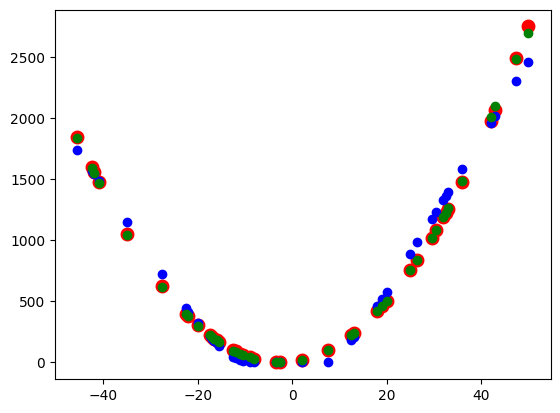

In [27]:
plt.scatter(x_test, y_test, color='red', linewidths=4)
plt.scatter(x_test, y_pred_1, color='blue')
plt.scatter(x_test, y_pred_2, color='green')
plt.show()

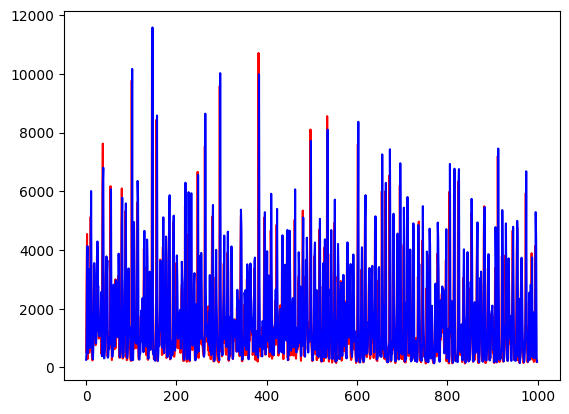

In [28]:
plt.plot(hist_2.history['val_loss'], color='red')
plt.plot(hist_2.history['loss'], color='blue')
plt.show()